<h1>Embeddings with Keras</h1>

#### Mounting Google Drive and libraries loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Cursos/DL360 N2')

In [ ]:
%%capture
!pip install funpymodeling

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, Flatten, Dropout

from funpymodeling.exploratory import status, freq_tbl, profiling_num
from funpymodeling.data_prep import todf

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_all(history, metric):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history[metric], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_'+metric], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title=metric)

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2]

#### Data Loading



In [ ]:
data = pd.read_csv('data/encuesta_sysarmy_arg_2019_1.csv')

#### Dataset Status


In [ ]:
data.shape

(4482, 47)

In [ ]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Me identifico,0,0.000000,0,0.000000,3,object
1,Tengo,0,0.000000,0,0.000000,58,int64
2,Dónde estás trabajando,0,0.000000,0,0.000000,25,object
3,Años de experiencia,0,0.000000,235,0.052432,52,float64
4,Años en la empresa actual,0,0.000000,1038,0.231593,48,float64
5,Años en el puesto actual,0,0.000000,921,0.205489,39,float64
6,¿Gente a cargo?,0,0.000000,3335,0.744087,47,int64
7,Nivel de estudios alcanzado,0,0.000000,0,0.000000,7,object
8,Estado,0,0.000000,0,0.000000,3,object
9,Carrera,554,0.123606,0,0.000000,1485,object


In this data set there are variables with NaNs and high cardinality variables 

In [ ]:
data.head()

,Me identifico,Tengo,Dónde estás trabajando,Años de experiencia,Años en la empresa actual,Años en el puesto actual,¿Gente a cargo?,Nivel de estudios alcanzado,Estado,Carrera,Universidad,Realizaste cursos de especialización,¿Contribuís a proyectos open source?,¿Programás como hobbie?,Trabajo de,Plataformas,Lenguajes de programación,"Frameworks, herramientas y librerías",Bases de datos,QA / Testing,IDEs,¿Qué SO usás en tu laptop/PC para trabajar?,¿Y en tu celular?,¿Tenés guardias?,Cuánto cobrás por guardia,"¿Porcentaje, bruto o neto?",Tipo de contrato,Salario mensual BRUTO (en tu moneda local),Salario mensual NETO (en tu moneda local),¿Qué tan conforme estás con tu sueldo?,Cómo creés que está tu sueldo con respecto al último semestre,Recibís algún tipo de bono,A qué está atado el bono,¿Tuviste ajustes por inflación en 2018?,¿De qué % fue el ajuste?,¿En qué mes fue el último ajuste?,¿Sufriste o presenciaste situaciones de violencia laboral?,Orientación sexual,¿Tenés algún tipo de discapacidad?,¿Sentís que esto te dificultó el conseguir trabajo?,¿A qué eventos de tecnología asististe en el último año?,Cantidad de empleados,Actividad principal,¿La recomendás como un buen lugar para trabajar?,¿Cómo calificás las políticas de diversidad e inclusión?,¿A cuántos kilómetros de tu casa queda la oficina?,Beneficios extra
0,Hombre,22,Catamarca,2.0,1.0,1.0,0,Universitario,En curso,ING informática,Unca,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,Linux,"HTML, Javascript, PHP, Python","Django, Toba Framework","MySQL, PostgreSQL",Selenium,Atom,Linux,Android,No,0.0,Bruto,Full-Time,35000.0,33000.0,2,3,Menos de un sueldo,Mix de las anteriores,Dos,25.0,5,Jamás,Heterosexual,NaN,NaN,NaN,1001-2000,Producto basado en Software,8,9,2.0,Capacitaciones y/o cursos
1,Hombre,23,Catamarca,2.0,1.0,1.0,0,Secundario,Completado,Ing informática,UNCa,"Sí, de forma particular",No,Sí,"Developer, SysAdmin y Redes","Linux, VMWare, Proxmox, Mikrotik, Cisco","Bash/Shell, CSS, HTML, Javascript, PHP, Python...","Cordova, Django, Node.js, React.js, WordPress,...","Informix, MariaDB, MongoDB, MySQL, PostgreSQL",Selenium,"Atom, Nano",Linux,Android,No,0.0,Porcentaje de mi sueldo,Part-Time,25000.0,22000.0,2,1,Un sueldo,Mix de las anteriores,Uno,22.0,12,Jamás,Heterosexual,NaN,NaN,Charlas online,51-100,Producto basado en Software,8,10,2.0,"Capacitaciones y/o cursos, Licencia de paterni..."
2,Mujer,35,Chaco,8.0,7.0,2.0,2,Posgrado,En curso,MTI,Universidad del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,Developer,NaN,".NET, R",".NET Core, shiny, entre otras librerías de R",MSSQL,NaN,"RStudio, Sublime Text, Visual Studio",Windows,Android,"Sí, pasiva",0.0,Neto,Full-Time,50000.0,45000.0,2,2,De uno a tres sueldos,Performance de la compañía,Dos,4.0,10,En mi trabajo actual,dgsdg,NaN,No,varios,201-500,Otras industrias,4,4,0.2,"Capacitaciones y/o cursos, Licencia de paterni..."
3,Hombre,41,Chaco,20.0,2.0,10.0,0,Universitario,Completado,Lic en sistemas,Uba / CAECE,"Sí, los pagó un empleador",No,No,Developer,NaN,".NET, C#, CSS, HTML, Javascript, TypeScript",Angular,MySQL,NaN,"Visual Studio, Vs code",Mac OS X,Android,No,0.0,Bruto,Freelance,70000.0,65000.0,3,2,No,No recibo bono,Más de dos,40.0,10,Jamás,Heterosexual,NaN,NaN,Ninguno,1-10,Servicios / Consultoría de Software / Digital,5,1,-1.0,"Horarios flexibles, Vacaciones flexibles (adic..."
4,Hombre,35,Chaco,5.0,3.0,2.0,0,Universitario,Completado,Analisis en Sistemas,UTN,"Sí, los pagó un empleador",No,No,Product Manager,"Google Cloud Platform/App Engine, Linux",NaN,NaN,MySQL,NaN,NaN,Linux,Android,No,0.0,Neto,Full-Time,35000.0,28780.0,2,2,No,No recibo bono,Uno,10.0,10,En mi trabajo actual,Heterosexual,NaN,No,NaN,501-1000,Producto basado en Software,8,8,1.0,"Capacitaciones y/o cursos, Clases de idiomas, ..."


#### Data Preparation

In [ ]:
input = 'Universidad'
target = 'Salario mensual BRUTO (en tu moneda local)'
data_x = data[[input]]

In [ ]:
profiling_num(data[target])

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,Salario mensual BRUTO (en tu moneda local),66708.338151,387420.626264,5.807679,31.8898,14500.0,32508.25,49000.0,70000.0,137000.0,250000.0


The variation coefficient is bigger than 1, so i will decrease it

In [ ]:
freq_tbl(data[input])

,Universidad,frequency,percentage,cumulative_perc
0,UTN,471,0.105087,0.128338
1,UBA,337,0.075190,0.220163
2,UADE,106,0.023650,0.249046
3,Universidad de Buenos Aires,92,0.020527,0.274114
4,Utn,84,0.018742,0.297003
...,...,...,...,...
1051,Instituto ORT,1,0.000223,0.998910
1052,Inst beltran,1,0.000223,0.999183
1053,Universidad Politecnica Territorial de Aragua ...,1,0.000223,0.999455
1054,U.N.O,1,0.000223,0.999728


Removing extremes from target variable

In [ ]:
data_y_prep = np.where(data[target] > 137000, 137000, data[target])
data_y_prep

array([ 35000.,  25000.,  50000., ...,  23000.,  41000., 137000.])

Scaling

In [ ]:
scaler = MinMaxScaler()
data_y = scaler.fit_transform(todf(data_y_prep))

In [ ]:
profiling_num(data_y)

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,0,0.404588,0.234491,0.579579,0.000225,0.105833,0.237281,0.35766,0.510945,1.0,1.0


Now the variation coefficient is smaller than before

Separating in training set and test set

In [ ]:
x_train_base, x_test_base, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcabc90c5f8>]],
      dtype=object)

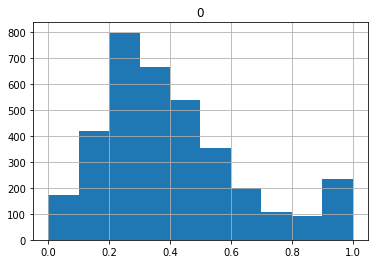

In [ ]:
todf(y_train).hist()

#### Models creation (with embeddings)

In [ ]:
data_x[input]

0                                  Unca
1                                  UNCa
2              Universidad del Nordeste
3                           Uba / CAECE
4                                   UTN
                     ...               
4477    Universidad Nacional de Tucuman
4478                                UTN
4479                           Siglo 21
4480               Universidad Isabel I
4481                                NaN
Name: Universidad, Length: 4482, dtype: object

Applying label encoder (filling nans with 'nan')

In [ ]:
data_x2 = data_x[input].fillna('nan')

In [ ]:
le = preprocessing.LabelEncoder()

le.fit_transform(data_x2)

array([ 679,  502,  876, ...,  413,  731, 1001])

In [ ]:
x_train2 = le.transform(x_train_base[input].fillna('nan')) 
x_test2 = le.transform(x_test_base[input].fillna('nan'))

In [ ]:
x_train.shape

(3585,)

In [ ]:
in_dim = x_train.max()+1
in_dim

1057

Models creation with embedding layer (its a regression problem, so, the last layer its a single neuron layer with linear activation function)

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=in_dim, input_length=1, output_dim=10))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1, 10)             10570     
_________________________________________________________________
flatten_6 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 9         
Total params: 10,667
Trainable params: 10,667
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01),  # default lr=0.01 
              loss='MSE',
              metrics='MAE')

Fitting the model

In [ ]:
history = model.fit(x_train2, y_train, epochs=12, batch_size=2048, validation_split=0.2)

Epoch 1/12
2/2 [==============================] - 1s 179ms/step - loss: 0.2265 - MAE: 0.4135 - val_loss: 0.1863 - val_MAE: 0.3593
Epoch 2/12
2/2 [==============================] - 0s 52ms/step - loss: 0.1739 - MAE: 0.3465 - val_loss: 0.1493 - val_MAE: 0.3076
Epoch 3/12
2/2 [==============================] - 0s 48ms/step - loss: 0.1384 - MAE: 0.2937 - val_loss: 0.1166 - val_MAE: 0.2582
Epoch 4/12
2/2 [==============================] - 0s 50ms/step - loss: 0.1057 - MAE: 0.2410 - val_loss: 0.0903 - val_MAE: 0.2208
Epoch 5/12
2/2 [==============================] - 0s 56ms/step - loss: 0.0790 - MAE: 0.2014 - val_loss: 0.0730 - val_MAE: 0.2004
Epoch 6/12
2/2 [==============================] - 0s 50ms/step - loss: 0.0625 - MAE: 0.1844 - val_loss: 0.0659 - val_MAE: 0.1978
Epoch 7/12
2/2 [==============================] - 0s 54ms/step - loss: 0.0571 - MAE: 0.1864 - val_loss: 0.0661 - val_MAE: 0.2055
Epoch 8/12
2/2 [==============================] - 0s 51ms/step - loss: 0.0586 - MAE: 0.1975 - va

Plotting MAE and Loss

In [ ]:
fig1,fig2 = plot_all(history, 'MAE')
fig1.show()
fig2.show()

#### Sanity Check

In [ ]:
y_pred_test = model.predict(x_test2).flatten()

In [ ]:
pd_res=pd.DataFrame({'y_test':y_test[:,0], 'pred':y_pred_test})
pd_res

,y_test,pred
0,0.729925,0.420458
1,0.510945,0.420458
2,0.875912,0.298315
3,0.291966,0.524523
4,0.569340,0.438927
...,...,...
892,0.489047,0.567818
893,0.207907,0.302805
894,0.510945,0.462731
895,0.000723,0.581868


<h3>Comparison with the baseline</h3>

In [ ]:
# base line (MAE)
print(abs(y_test - y_test.mean()).mean())

# embedding
print(abs(y_test - y_pred_test).mean())

0.1693384318266124
0.19259571227489788


<h3>Analyzing the results</h3>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcab73d12e8>]],
      dtype=object)

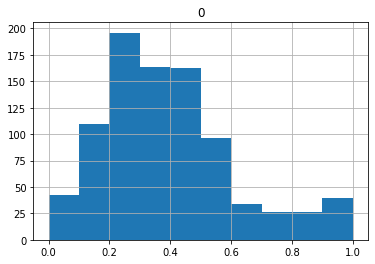

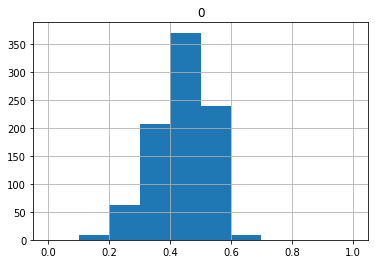

In [ ]:
todf(y_test).hist(range=(0, 1))
todf(y_pred_test).hist(range=(0, 1))

<h3>Analyzing the output distributions</h3>

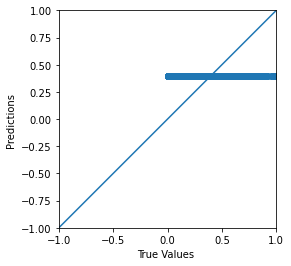

In [ ]:
a = plt.axes(aspect='equal')

plt.scatter(y_test, np.repeat(y_test.mean(), len(y_test)))
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [-1, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

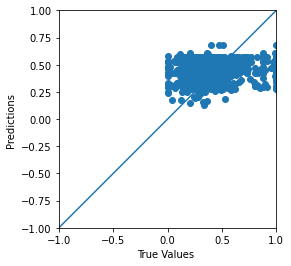

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_test)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
lims = [-1, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

#### Insights

With this architecture, the performance is similar to the baseline. Also, using embeddings and 'Universidad' as input, i get a better performance than using 'Trabajo de'. Also, the embedding approach is much better than using the one hot encoding approach, because both input variables are high cardinality variables.